In [78]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline 
import re
# wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('TS.csv',index_col=0)
data

,album,image,lyrics,title,year
0,reputation,https://images.genius.com/5c8131af7d5d20f3c8f2...,[Verse 1]\nOur secret moments in a crowded roo...,Dress,2017-11-10
1,reputation,https://images.genius.com/5c8131af7d5d20f3c8f2...,[Verse 1]\nThere's glitter on the floor after ...,New Year's Day,2017-11-10
2,NaN,https://images.genius.com/ae7c9cd43bc34b7c3414...,"[Chorus]\nAnd all at once, you are the one I h...",The Making Of A Song - 'King of My Heart',NaN
3,Unreleased Songs,https://images.genius.com/ae7c9cd43bc34b7c3414...,\n Lyrics for this song h...,Wonderful Things*,NaN
4,NaN,https://images.genius.com/a4b0cfd9dcd67b54afe6...,[Verse 1]\nYou said the way my blue eyes shine...,Tim McGraw (Demo),NaN
5,Fearless (Platinum Edition),https://images.genius.com/58b77c98b2bf91fe599d...,"[Verse 1]\nOnce upon a time, I believe it was ...",Forever & Always (Piano Version),2008-11-11
6,"""Taylor's Songs"" 2003 Demo",https://images.genius.com/a5d1a45a54710b74f28a...,[Verse 1]\nLet's watch the tide chase the wave...,Smokey Black Nights,NaN
7,Vol. 2 Demo CD,https://images.genius.com/60c43c75d3b472c686a3...,[Verse 1]\nWalking downtown shuffling my feet\...,This Here Guitar,NaN
8,NaN,https://images.genius.com/b3a1401dee1819ccb104...,[Verse 1]\nI like the way you wanted me\nEvery...,"Baby, Don't You Break My Heart Slow",NaN
9,Red,https://images.genius.com/c84af279c97927e0c3cd...,"[Verse 1]\nLong handwritten note, deep in your...",Sad Beautiful Tragic,2012-10-22


In [4]:
pd.read_csv?

In [13]:
add_stopwords=set(['Vers', 'Lyrics'])
add_stopwords

{'Lyrics', 'Vers'}

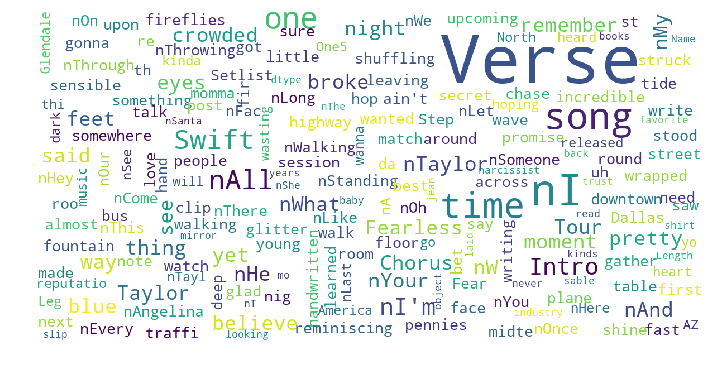

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS) | add_stopwords

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data.lyrics)

In [17]:
    datas=data.lyrics
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(datas))

In [76]:
data.lyrics.head()

0    [Verse 1]\nOur secret moments in a crowded roo...
1    [Verse 1]\nThere's glitter on the floor after ...
2    [Chorus]\nAnd all at once, you are the one I h...
3              \n            Lyrics for this song h...
4    [Verse 1]\nYou said the way my blue eyes shine...
Name: lyrics, dtype: object

## Output with Cleaning

In [64]:
rep1=lambda x: re.sub(r'\[.*\]','', str(x))
rep2=lambda x:re.sub(r'\n', ' ', str(x))

In [75]:
# remove []
data['cleaned_lyrics']=data.lyrics.apply(rep1)
# remove newline
data['cleaned_lyrics']=data.cleaned_lyrics.apply(rep2)
# all to lower
data['cleaned_lyrics']=data.cleaned_lyrics.apply(lambda x: x.lower())

In [73]:
data.cleaned_lyrics[0]

" our secret moments in a crowded room they got no idea about me and you there is an indentation in the shape of you made your mark on me, a golden tattoo   all of this silence and patience, pining and anticipation my hands are shaking from holding back from you ha, ah, ah all of this silence and patience, pining and desperately waiting my hands are shaking from all this ah, ha, ha, ha-ah   say my name and everything just stops i don't want you like a best friend only bought this dress so you could take it off take it oh, ha, ha, ha-ah carve your name into my bedpost ’cause i don't want you like a best friend only bought this dress so you could take it off take it oh, ha, ha, ha-ah   inescapable, i'm not even gonna try and if i get burned, at least we were electrified i’m spilling wine in the bathtub you kiss my face and we're both drunk everyone thinks that they know us but they know nothing about—   all of this silence and patience, pining and anticipation my hands are shaking from h

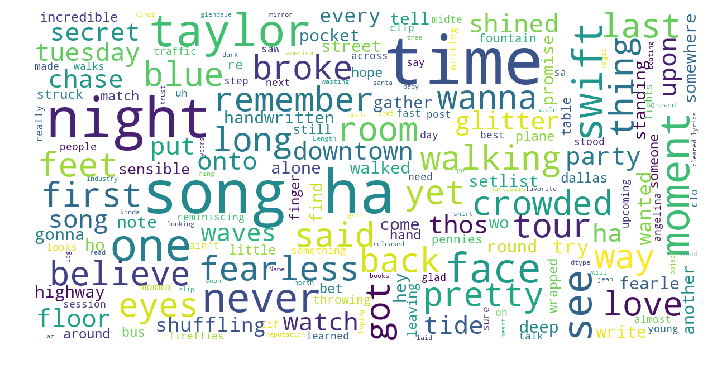

In [74]:
show_wordcloud(data.cleaned_lyrics)

## Final API

In [85]:
def clean_lyrics(data):
    rep1=lambda x: re.sub(r'\[.*\]','', str(x))
    rep2=lambda x:re.sub(r'\n', ' ', str(x))
    # remove []
    data=data.apply(rep1)
    # remove newline
    data=data.apply(rep2)
    # all to lower
    data=data.apply(lambda x: x.lower())
    return data

def show_wordcloud(data, title = None):
    data=clean_lyrics(data)
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

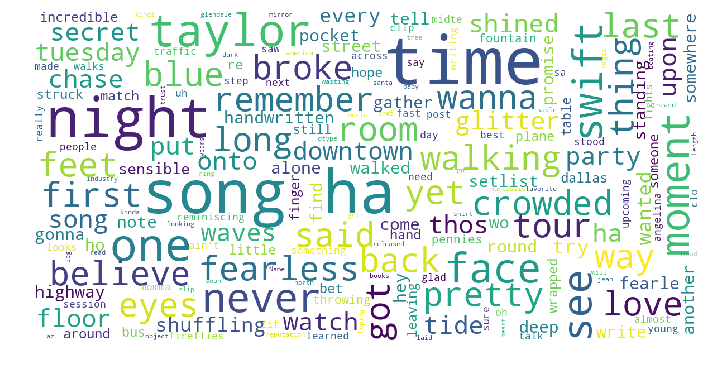

In [86]:
show_wordcloud(data.lyrics)